# XRR Analysis

In [1]:
#http://blog.nextgenetics.net/?e=102
from IPython.display import HTML
HTML('''<script>
code_show_2=true; 
function code_toggle_2() {
 if (code_show_2){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show_2 = !code_show_2
} 
$( document ).ready(code_toggle_2);
</script>
The raw code for this Jupyter Notebook is by default hidden for easier reading.
To toggle on/off the raw code for this entire notebook, click <a href="javascript:code_toggle_2()">here</a>.''')


In [2]:
# importing the necessary libraries and packages for XRR.ipynb
import ipywidgets as widgets
from ipywidgets import Label, Layout
from IPython.display import display, Markdown, clear_output
from IPython.display import display
from IPython.display import Image
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy import integrate
from IPython.display import IFrame



# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
# https://gist.github.com/Zsailer/5d1f4e357c78409dd9a5a4e5c61be552

# This tag allows the supression of input cells that have to deal with formatting and code.
# You are viewing the "code" version of the "click here" button you just pressed
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
(To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.)''')
display(tag)

# Data Reduction and Analysis

*Data has no meaning until you analyze.*

### Data Reduction: Following Lab1_XRR_Assignment_v2.pdf

The "Lab1_XRR_Assignment_v2.pdf" on CANVAS provides you with guidelines and hints that are important for understanding your measured data. Follow the steps listed and read through each section carefully. For example, within the "hints" section, you will find the structure of your data files (i.e. what each column represents).

The method to calculate error bars is also outlined. Pay close attention to the units of different parameters and column values.


### Inspecting the Data: First step to Analysis

<img src="https://github.com/josephmccourt2018/lab_jupyter_notebooks/blob/master/images/xrr.png?raw=true" /> 


Following **Fig. 1**, we will now do approximations of certain features of the data. It is a good practice to inspect the data first before immediately performing a fit. This way, you will be able to tell whether or not your data makes sense and understand more about what the fit is telling you.

  1. Find $\theta_\text{critical}$
  2. Approximate thickness (related period of oscillations)
  3. Approximate roughness 
  
You may wish to enter your approximate values for these 3 values into the drop down menu below. To do so, show the cell's raw code input by clicking the blue text "here" button and entering your values into the respective variables. Make sure to run the cell afterwards to update the values. Also, pay close attentions to the units of the parameters.

In [3]:
# Here is a list of important parameters for you to fill out
display(tag)

critical_angle = 0.3 # deg
thickness = 250 # Angstroms
roughness = 7 # Angstroms


In [4]:
# selecting variables for button
button_variables = ['critical_angle', 'thickness', 'roughness']
funcs = []
for i in button_variables:
    funcs.append(i)
 
# creating menu with them   
button_vars = widgets.Dropdown(
    options=funcs)
# button, output, function and linkage
butt = widgets.Button(description='Print Variable')
outt = widgets.Output()
def on_butt_clicked(b):
    with outt:
        clear_output()
        #print(type(globals()[button_vars.value]))
        print(globals()[button_vars.value])
        
butt.on_click(on_butt_clicked)
# display
widgets.VBox([button_vars,butt,outt])

#### Theory and Fitting the Data

One way to fit your reflectivity data is to use the interface reflectivity model discussed in class. The slide below should look familiar to you:


<img src="https://github.com/josephmccourt2018/lab_jupyter_notebooks/blob/master/images/thin_film_reflectivity_class_slide.png?raw=true" /> 


We can use the equation above to fit our reflectivity data, where I have replaced $R_{F}(Q)$ by its functional form:

$$R(Q) = \Big[2\Big(\frac{Q}{Q_c}\Big)^{2}-1-2\Big(\frac{Q}{Q_c}\Big)\sqrt{\Big(\frac{Q}{Q_c}\Big)^2-1}\Big]^{2}\Big(1-4B(1-B)\Big(\sin\frac{Qt}{2}\Big)^{2}\Big)\exp^{-Q^2\sigma^2}$$

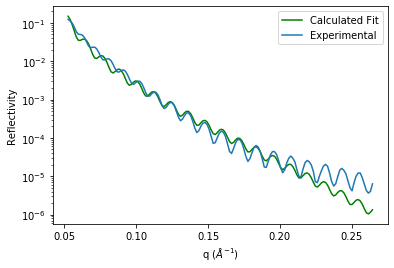

B = 1.1635224931773538
thickness (t) [Angstroms] = 529.6936314519822
sigma (roughness) [Angstroms] = 7.65190221099023


In [5]:
display(tag)

# need to add in a way to locate the q_critical (q_c) instead of just manually inputting the value
qc = 0.045

file = 'https://raw.githubusercontent.com/josephmccourt2018/lab_jupyter_notebooks/master/example/xrr.csv'

data = pd.read_csv(file,header = None)

def rf(q):
    return (2*(q/qc)**2-1-2*(q/qc)*np.sqrt((q/qc)**2-1))**2

def r_lowq(q,B,t,sigma):
    return (1-4*B*(1-B)*(np.sin(q*t/2))**2)*np.exp(-q**2*sigma**2)

def r(q,B,t,sigma):
    return rf(q)*r_lowq(q,B,t,sigma)

#only fit certain range of low q data
sliceobj=slice(30,180)

guess = [1.3,525,8]
popt, pcov = curve_fit(r, data[0][sliceobj], data[1][sliceobj],sigma = data[1][sliceobj],p0 = guess)

plt.yscale('log')
plt.plot(data[0][sliceobj],r(data[0][sliceobj],*popt),label = "Calculated Fit",color ='g')
plt.errorbar(data[0][sliceobj], data[1][sliceobj],label="Experimental",ecolor='r')
plt.legend()
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('Reflectivity')
plt.show()

print("B = " + str(popt[0]))
print("thickness (t) [Angstroms] = " + str(popt[1]))
print("sigma (roughness) [Angstroms] = " + str(popt[2]))

<div class="alert alert-block alert-info">
    <strong> Think about it... </strong>
    
What are units of the $B$ parameter and what does it represent? Does this value make sense for the sample you measured?
</div>